In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

crime_df = pd.read_csv("CrimesOnWomenData.csv")
desc_df = pd.read_csv("description.csv")

crime_df.head(), desc_df

(   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
 0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
 1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
 2           2              ASSAM  2001   817  1070   59   850     4  1248   0
 3           3              BIHAR  2001   888   518  859   562    21  1558  83
 4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0,
    Unnamed: 0 Column Names                       Explanation
 0           0        State                             State
 1           1         Year                              Year
 2           2         Rape                 No. of Rape cases
 3           3          K&A                Kidnap And Assault
 4           4           DD                      Dowry Deaths
 5           5          AoW             Assault against women
 6           6          AoM  Assault against modesty of women
 7           7           DV  

In [2]:
crime_df.info()
crime_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


,0
Unnamed: 0,0
State,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


In [3]:
crime_df = crime_df.drop(columns=["Unnamed: 0"], errors="ignore")

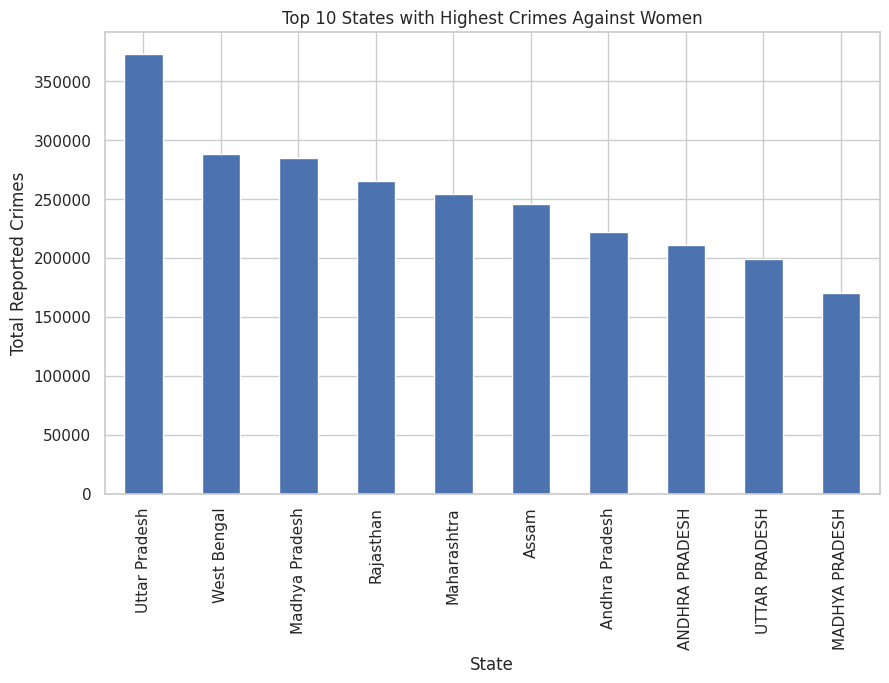

In [4]:
state_crime = crime_df.groupby("State").sum().sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_crime.head(10).plot(kind="bar")
plt.title("Top 10 States with Highest Crimes Against Women")
plt.ylabel("Total Reported Crimes")
plt.show()

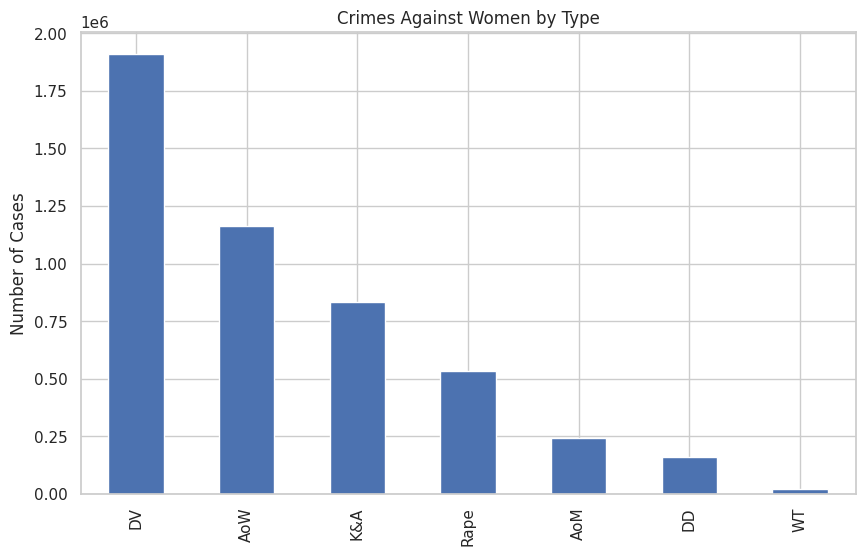

In [5]:
crime_types = crime_df.drop(columns=["State", "Year"])
crime_type_sum = crime_types.sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
crime_type_sum.plot(kind="bar")
plt.title("Crimes Against Women by Type")
plt.ylabel("Number of Cases")
plt.show()

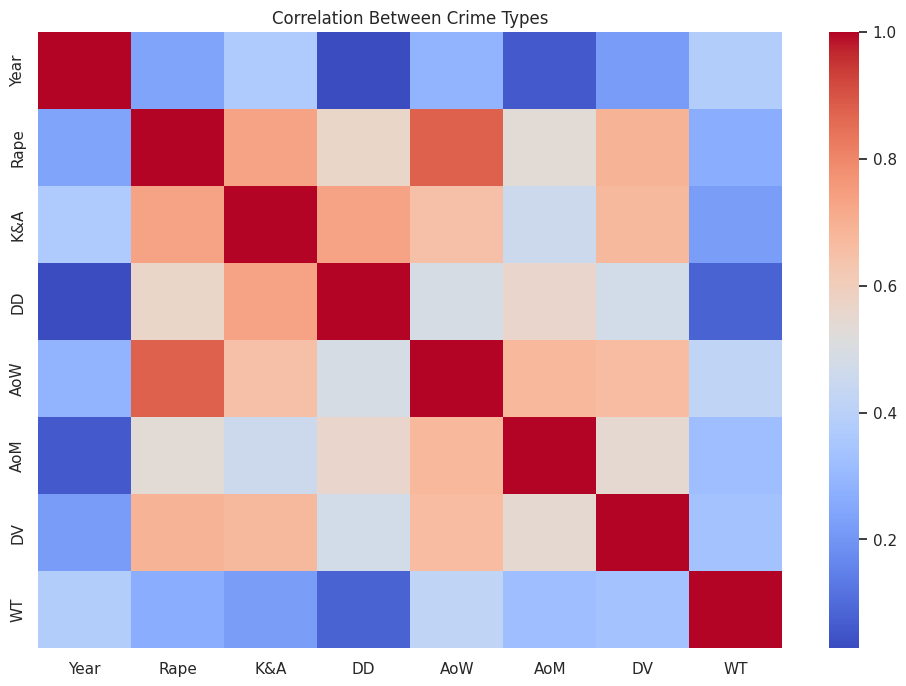

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(crime_df.groupby("State").sum().corr(), cmap="coolwarm")
plt.title("Correlation Between Crime Types")
plt.show()

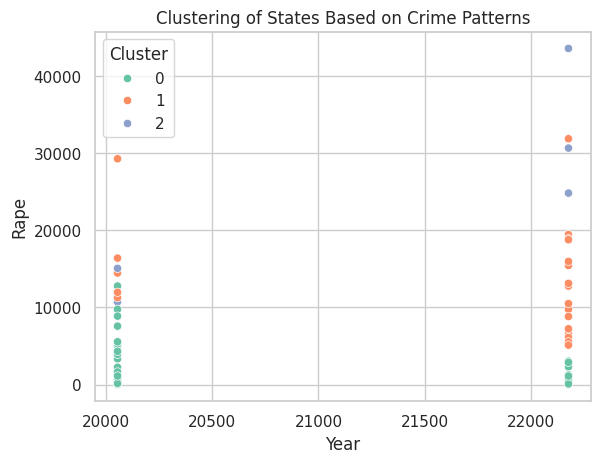

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = crime_df.groupby("State").sum()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X["Cluster"] = clusters

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=X["Cluster"], palette="Set2")
plt.title("Clustering of States Based on Crime Patterns")
plt.show()